# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
import scipy.stats as st


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 639


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wipperfurth
Processing Record 2 of Set 1 | launceston
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | koslan
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | sioux lookout
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | husavik
Processing Record 10 of Set 1 | cherskiy
Processing Record 11 of Set 1 | isangel
Processing Record 12 of Set 1 | ende
Processing Record 13 of Set 1 | egvekinot
Processing Record 14 of Set 1 | amderma
City not found. Skipping...
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | bashtanka
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | namatanai
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | itumba
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wipperfurth,51.1167,7.4000,10.68,96,100,4.53,DE,1680357351
1,launceston,-41.4500,147.1667,8.97,80,83,2.06,AU,1680357352
2,hermanus,-34.4187,19.2345,24.89,52,0,7.88,ZA,1680357352
3,punta arenas,-53.1500,-70.9167,7.06,70,75,4.63,CL,1680357352
4,koslan,63.4564,48.8989,0.05,99,100,1.67,RU,1680357352


In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wipperfurth,51.1167,7.4000,10.68,96,100,4.53,DE,1680357351
1,launceston,-41.4500,147.1667,8.97,80,83,2.06,AU,1680357352
2,hermanus,-34.4187,19.2345,24.89,52,0,7.88,ZA,1680357352
3,punta arenas,-53.1500,-70.9167,7.06,70,75,4.63,CL,1680357352
4,koslan,63.4564,48.8989,0.05,99,100,1.67,RU,1680357352


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

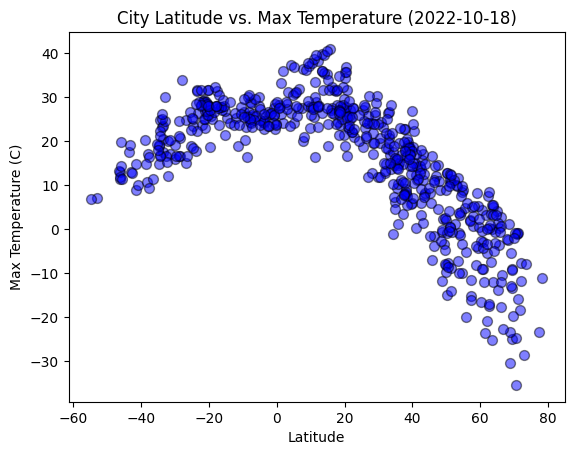

In [41]:
# Build scatter plot for latitude vs. temperature
x_lat = city_data_df['Lat']
y_temp = city_data_df['Max Temp']
plt.scatter(x_lat,y_temp, c ="blue", linewidths = 1, marker ="o", edgecolor ="black", s = 50, alpha=0.5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

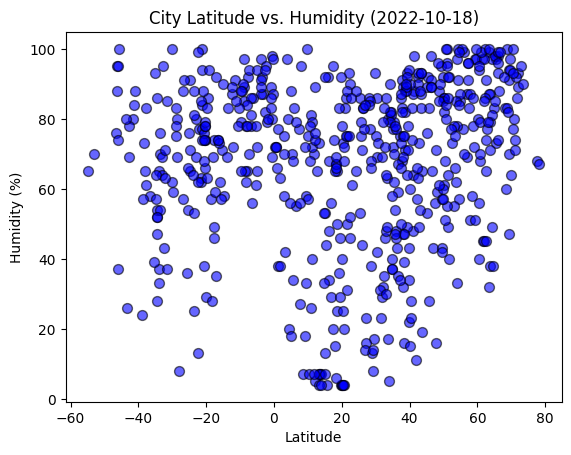

In [43]:
# Build the scatter plots for latitude vs. humidity
x_lat = city_data_df['Lat']
y_hum = city_data_df['Humidity']
plt.scatter(x_lat,y_hum, c ="blue", linewidths = 1, marker ="o", edgecolor ="black", s = 50, alpha=0.6)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

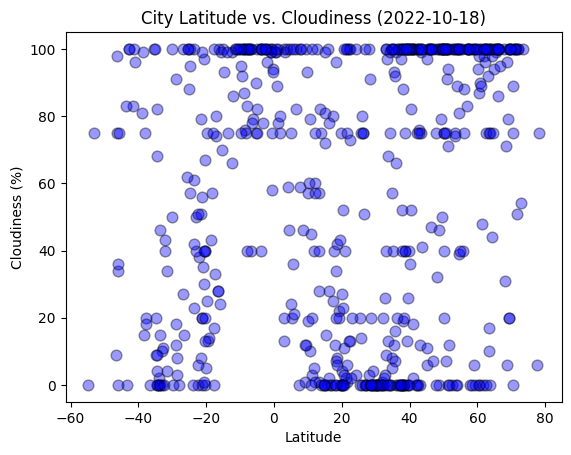

In [45]:
# Build the scatter plots for latitude vs. cloudiness
x_lat = city_data_df['Lat']
y_cloud = city_data_df['Cloudiness']
plt.scatter(x_lat,y_cloud, c ="blue", linewidths = 1, marker ="o", edgecolor ="black", s = 60, alpha=0.4)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

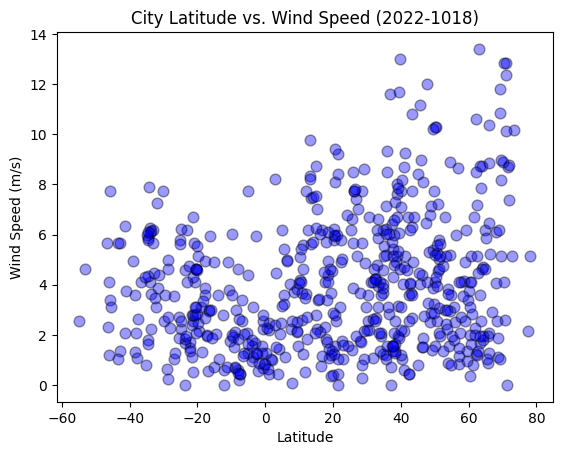

In [46]:
# Build the scatter plots for latitude vs. wind speed
x_lat = city_data_df['Lat']
y_wind = city_data_df['Wind Speed']
plt.scatter(x_lat,y_wind, c ="blue", linewidths = 1, marker ="o", edgecolor ="black", s = 60, alpha=0.4)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-1018)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def lin_reg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    corr = st.pearsonr(x,y)
    print(f'The correlation is {round(corr[0],2)}')
    plt.scatter(x, y)
    plt.plot(y, regress_values,"r-")
    return plt.show()

The correlation is 0.11


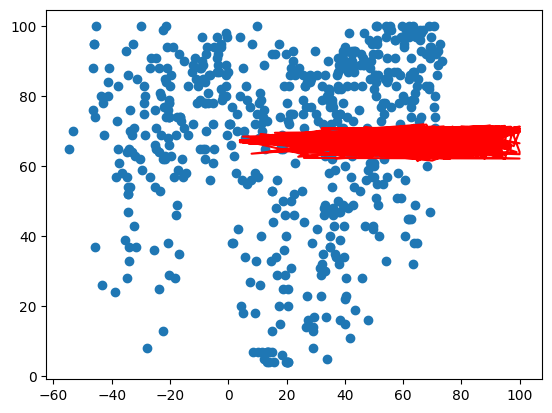

In [16]:
lin_reg(x_lat,y_hum)

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wipperfurth,51.1167,7.4000,10.68,96,100,4.53,DE,1680357351
4,koslan,63.4564,48.8989,0.05,99,100,1.67,RU,1680357352
5,tiksi,71.6872,128.8694,-18.35,86,51,8.69,RU,1680357353
6,sioux lookout,50.1001,-91.9170,-14.96,61,20,1.54,CA,1680357353
8,husavik,66.0449,-17.3389,2.73,98,100,2.06,IS,1680357368


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,launceston,-41.4500,147.1667,8.97,80,83,2.06,AU,1680357352
2,hermanus,-34.4187,19.2345,24.89,52,0,7.88,ZA,1680357352
3,punta arenas,-53.1500,-70.9167,7.06,70,75,4.63,CL,1680357352
7,mataura,-46.1927,168.8643,13.04,95,75,1.18,NZ,1680357353
10,isangel,-19.5500,169.2667,25.70,86,13,2.16,VU,1680357369


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:  -0.88


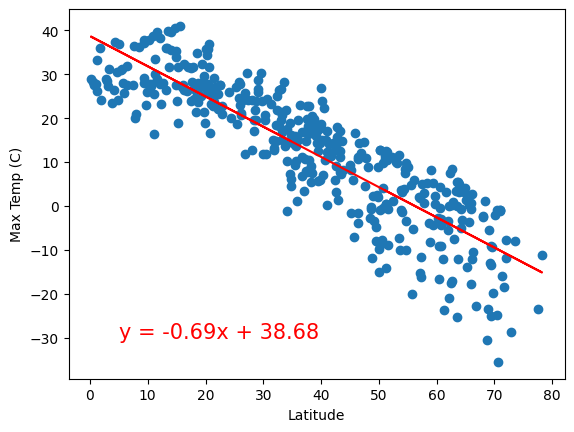

In [22]:
# Linear regression on Northern Hemisphere
x_north = northern_hemi_df['Lat']
y_north = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_north, y_north)
print(f'The r-value is:  {round(corr[0],2)}')
plt.scatter(x_north, y_north)
plt.annotate(line_eq,(5,-30),fontsize=15,color="red")
plt.plot(x_north, regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.show()

The r-value is:  0.65


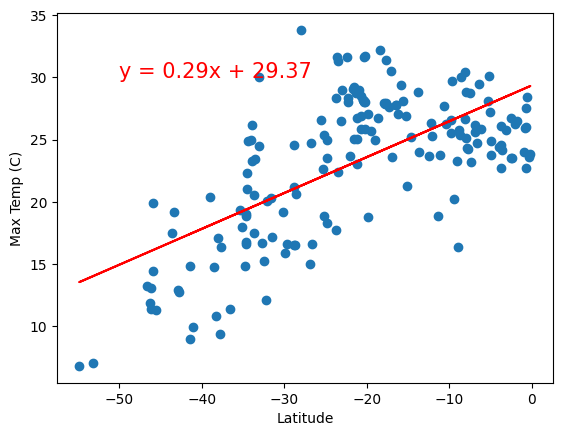

In [26]:
# Linear regression on Southern Hemisphere
x_south = southern_hemi_df['Lat']
y_south = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_south, y_south)
print(f'The r-value is:  {round(corr[0],2)}')
plt.scatter(x_south, y_south)
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.plot(x_south, regress_values,"r-")
plt.show()

**Discussion about the linear relationship:** 

A strong negative relationship (r = -0.88)between latitude and temperature in the north and a rather strong positive relationship (r = 0.65) in the south.

For every unit increase in latitude, the temp decreases by 0.69 units in the north and for every unit increase in latitude in the south, temperature rises by 0.29.

In general the further away from the equator the cooler it is.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:  0.39


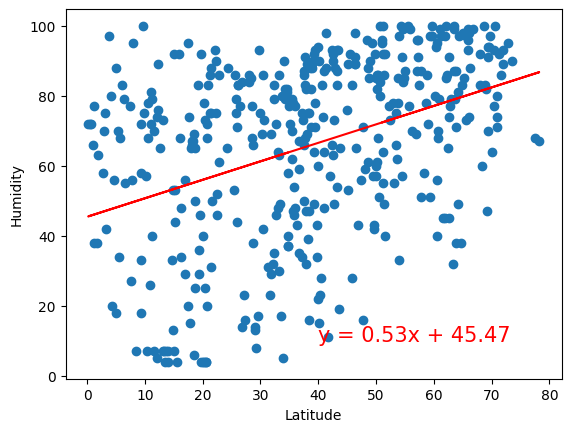

In [39]:
# Northern Hemisphere regression of Humidity on Latitude
x_north = northern_hemi_df['Lat']
y_nhum = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_nhum)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_north, y_nhum)
print(f'The r-value is:  {round(corr[0],2)}')
plt.scatter(x_north, y_nhum)
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(x_north, regress_values,"r-")
plt.show()

The r-value is:  0.3


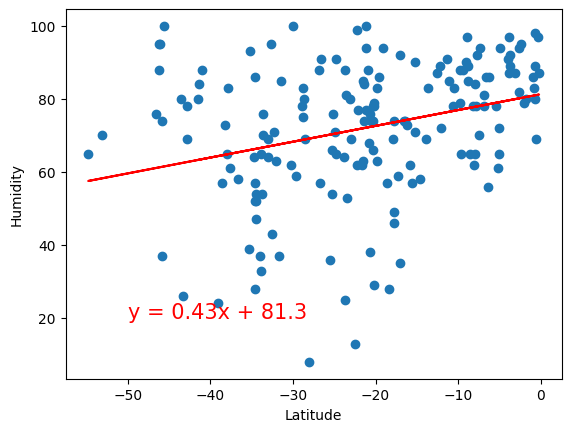

In [31]:
# Southern Hemisphere regression of Humidity on Latitude
x_south = southern_hemi_df['Lat']
y_shum = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_shum)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_south, y_shum)
print(f'The r-value is:  {round(corr[0],2)}')
plt.scatter(x_south, y_shum)
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(x_south, regress_values,"r-")
plt.show()

**Discussion about the linear relationship:** 

Weak positve relationship between latitude and humidity both in the north (r=0.39) and south (r=0.3)

For every unit increase in latitude, humidity increases 0.53 units (north) and 0.43 units (south).

In the north the further away from equator the more humid it is, while in the south the further away from the equator the less humid it is.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:  0.29


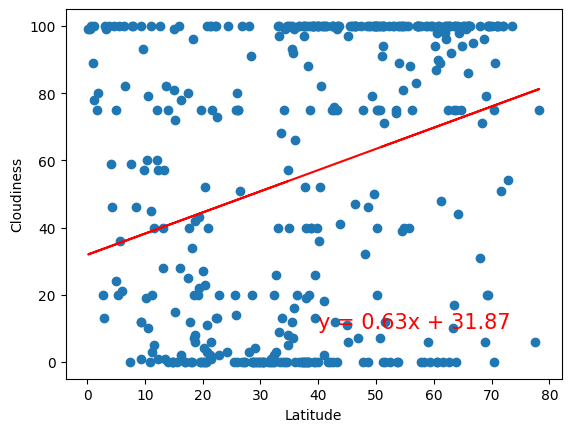

In [34]:
# Northern Hemisphere
x_north = northern_hemi_df['Lat']
y_ncloud = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_ncloud)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_north, y_ncloud)
print(f'The r-value is:  {round(corr[0],2)}')
plt.scatter(x_north, y_ncloud)
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(x_north, regress_values,"r-")
plt.show()

The r-value is:  0.45


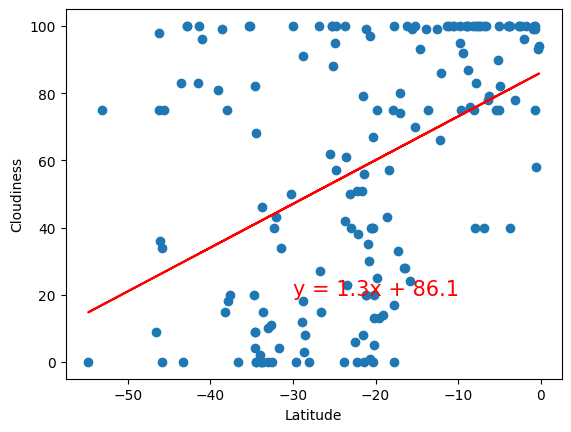

In [35]:
# Southern Hemisphere
x_south = southern_hemi_df['Lat']
y_scloud = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_scloud)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_south, y_scloud)
print(f'The r-value is:  {round(corr[0],2)}')
plt.scatter(x_south, y_scloud)
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(x_south, regress_values,"r-")
plt.show()

**Discussion about the linear relationship:** 

There is positive relationship between latitude and cloudiness. The relationship is rather moderate but stronger in the south than north (r=0.45 vs. 0.29).

For every unit increase in latitude, cloudiness increases by 0.63 units (northern hemisphere) and 1.3 units (southern hemisphere).

The further away from equator the cloudier it is in the north and the opposite in the south. 

Given that the scatter plots do not show much of relationship, the r-value could be misleading other test are needed to check if there is a relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:  0.17


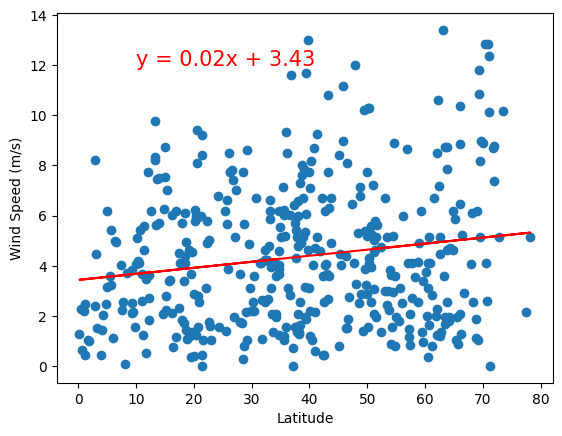

In [36]:
# Northern Hemisphere
x_north = northern_hemi_df['Lat']
y_nwind = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_nwind)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_north, y_nwind)
print(f'The r-value is:  {round(corr[0],2)}')
plt.scatter(x_north, y_nwind)
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.plot(x_north, regress_values,"r-")
plt.show()

The r-value is:  -0.37


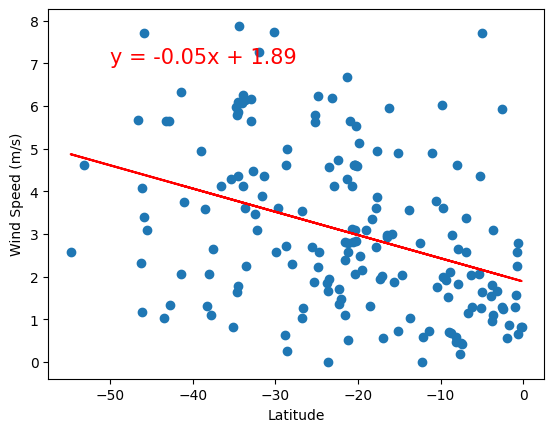

In [38]:
# Southern Hemisphere
x_south = southern_hemi_df['Lat']
y_swind = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_swind)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr = st.pearsonr(x_south, y_swind)
print(f'The r-value is:  {round(corr[0],2)}')
plt.scatter(x_south, y_swind)
plt.annotate(line_eq,(-50,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.plot(x_south, regress_values,"r-")
plt.show()

**Discussion about the linear relationship:** 


There is relationship between wind speed and latitude in the northern hemisphere albeit a weak positive one (r=0.17). It looks like the higher the latitude the strong the wind blows. For a one unit increase in latitude the windspeed increases by 0.02 units.


On the other hand the relationship between wind speed and latitude in the southern hemisphere is negative a little stronger (r = -0.37) than in the northen hemisphere. For a unit increase in latitude, wind speed decreases by 0.05 units.


In general we can conclude that the further away from the eaquator the stronger the winds are.